In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [50]:
import pandas as pd
import numpy as np

# Create a simple time series
np.random.seed(42)  # for reproducibility
n = 20
time_series = np.random.randn(n)

# Create a DataFrame
df = pd.DataFrame({'value': time_series})

# Add lag features
for lag in range(1, 5):
    df[f'lag{lag}'] = df['value'].shift(lag)

print(df)


       value      lag1      lag2      lag3      lag4
0   0.496714       NaN       NaN       NaN       NaN
1  -0.138264  0.496714       NaN       NaN       NaN
2   0.647689 -0.138264  0.496714       NaN       NaN
3   1.523030  0.647689 -0.138264  0.496714       NaN
4  -0.234153  1.523030  0.647689 -0.138264  0.496714
5  -0.234137 -0.234153  1.523030  0.647689 -0.138264
6   1.579213 -0.234137 -0.234153  1.523030  0.647689
7   0.767435  1.579213 -0.234137 -0.234153  1.523030
8  -0.469474  0.767435  1.579213 -0.234137 -0.234153
9   0.542560 -0.469474  0.767435  1.579213 -0.234137
10 -0.463418  0.542560 -0.469474  0.767435  1.579213
11 -0.465730 -0.463418  0.542560 -0.469474  0.767435
12  0.241962 -0.465730 -0.463418  0.542560 -0.469474
13 -1.913280  0.241962 -0.465730 -0.463418  0.542560
14 -1.724918 -1.913280  0.241962 -0.465730 -0.463418
15 -0.562288 -1.724918 -1.913280  0.241962 -0.465730
16 -1.012831 -0.562288 -1.724918 -1.913280  0.241962
17  0.314247 -1.012831 -0.562288 -1.724918 -1.

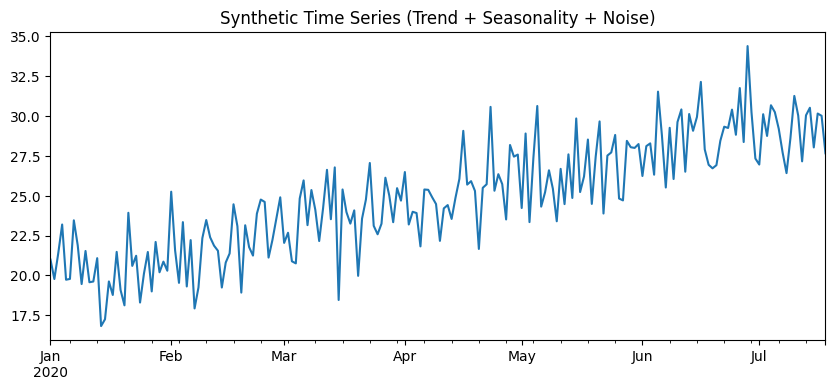

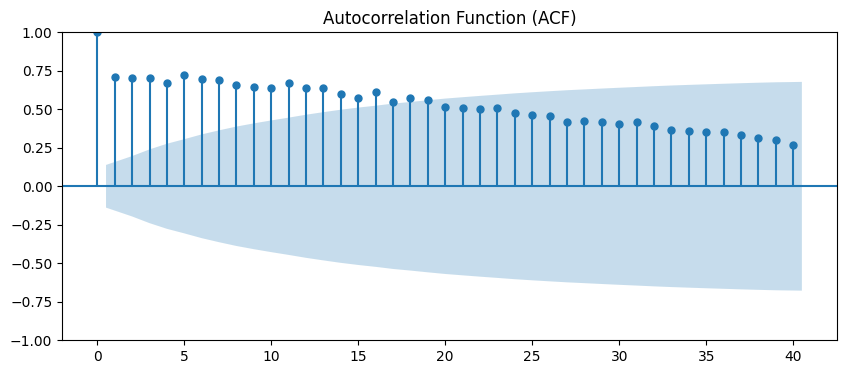

In [48]:
# Re-import necessary libraries after reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# --- 1. Create synthetic time series (trend + seasonality + noise) ---
np.random.seed(42)
n = 200
time = np.arange(n)

trend = time * 0.05
seasonality = 10 * np.sin(2 * np.pi * time / 12)  # 12-period seasonality
noise = np.random.normal(0, 2, n)
# y = 20 + trend + seasonality + noise
y=20 + trend + noise
# Put into a pandas Series with daily index
ts = pd.Series(y, index=pd.date_range("2020-01-01", periods=n, freq="D"))

# --- 2. Plot the time series ---
plt.figure(figsize=(10, 4))
ts.plot()
plt.title("Synthetic Time Series (Trend + Seasonality + Noise)")
plt.show()

# --- 3. Plot the Autocorrelation Function (ACF) ---
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(ts, lags=40, ax=ax)
plt.title("Autocorrelation Function (ACF)")
plt.show()

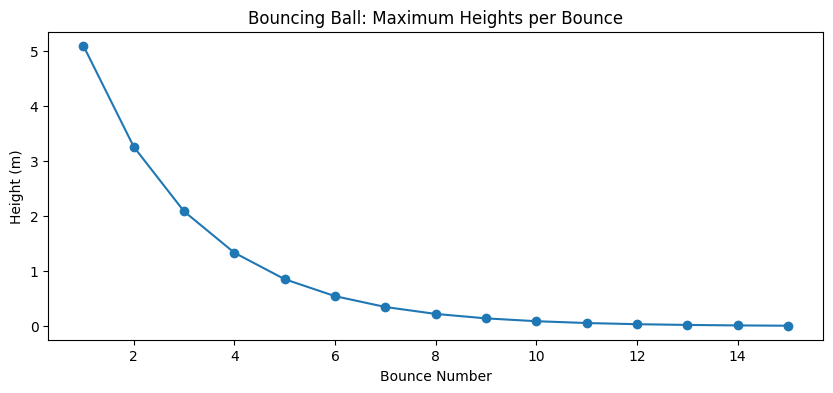

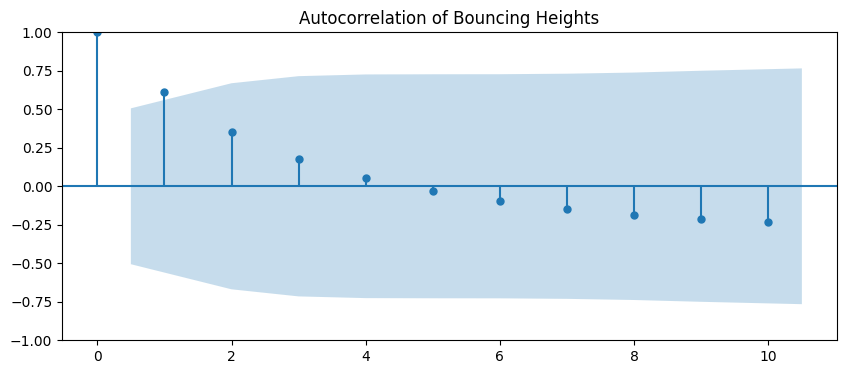

In [49]:

# --- Parameters ---
g = 9.81              # gravity (m/s^2)
v0 = 10.0             # initial upward velocity (m/s)
restitution = 0.8     # bounce efficiency (0 < e < 1)
n_bounces = 15        # number of bounces to simulate

# --- Simulate bounce heights ---
heights = []
v = v0
for i in range(n_bounces):
    h = v**2 / (2 * g)   # max height for current bounce
    heights.append(h)
    v = v * restitution  # reduce velocity after bounce

# Put into a pandas Series (index = bounce number)
bounce_series = pd.Series(heights, index=np.arange(1, n_bounces + 1))

# --- Plot bouncing heights as a time series ---
plt.figure(figsize=(10, 4))
bounce_series.plot(marker="o")
plt.title("Bouncing Ball: Maximum Heights per Bounce")
plt.xlabel("Bounce Number")
plt.ylabel("Height (m)")
plt.show()

# --- Plot ACF of bouncing heights ---
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(bounce_series, lags=10, ax=ax)
plt.title("Autocorrelation of Bouncing Heights")
plt.show()


<Figure size 1000x400 with 0 Axes>

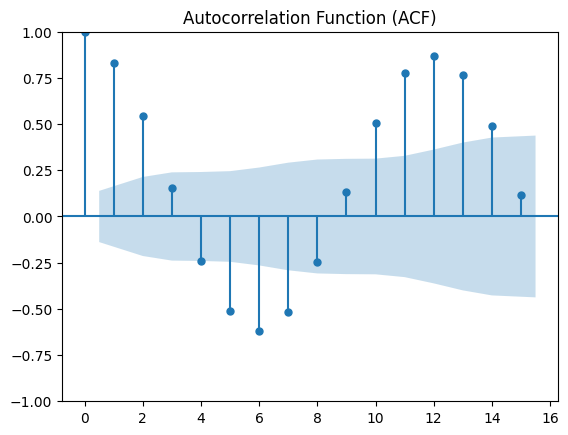

In [44]:
# --- 3. Plot the Autocorrelation Function (ACF) ---
plt.figure(figsize=(10, 4))
plot_acf(series, lags=15)
plt.title("Autocorrelation Function (ACF)")
plt.show()

CV

Saved combined CSV: models/cv/combined_results.csv


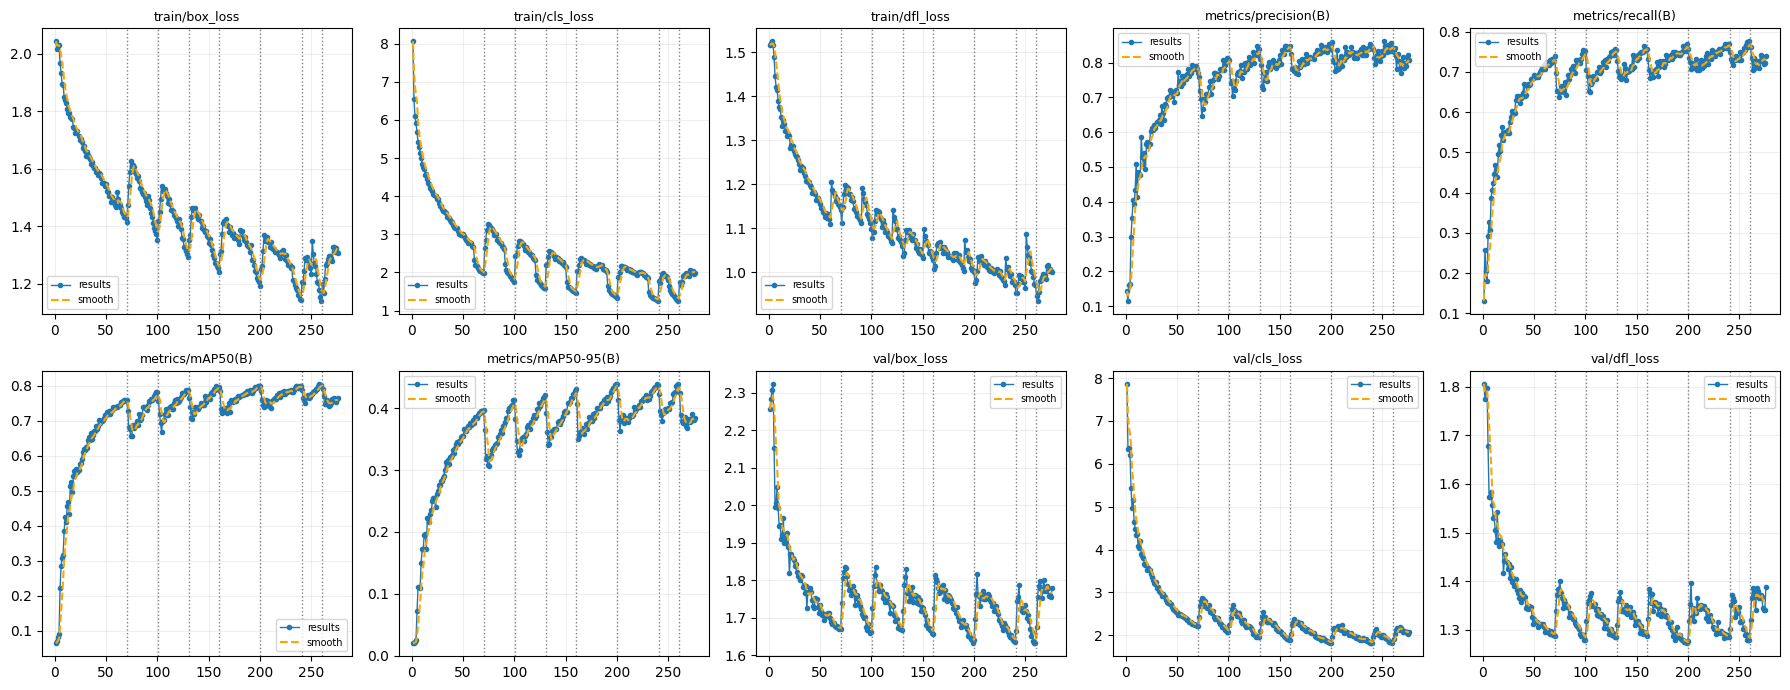

Saved combined plot: models/cv/combined_results.png


In [13]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt

# === paths to your results.csv files in order ===
csv_paths = [
    "models/cv/run/results.csv", # 70 Epochs
    "models/cv/run2_30epochs/results.csv",
    "models/cv/run3_30epochs/results.csv",
    "models/cv/run4_30epochs/results.csv",
    "models/cv/run5_40epochs/results.csv",
    "models/cv/run6_40epochs/results.csv",
    "models/cv/run7_20epochs/results.csv",
    "models/cv/run8_50epochs/results.csv"
    
]

# load & concat
dfs, lengths = [], []
for p in csv_paths:
    df = pd.read_csv(p)
    dfs.append(df)
    lengths.append(len(df))

combined = pd.concat(dfs, ignore_index=True)
combined['epoch_global'] = np.arange(1, len(combined)+1)

# save combined
out_csv = "models/cv/combined_results.csv"
os.makedirs(os.path.dirname(out_csv), exist_ok=True)
combined.to_csv(out_csv, index=False)
print("Saved combined CSV:", out_csv)

# metrics to plot
metrics_to_plot = [
    "train/box_loss", "train/cls_loss", "train/dfl_loss",
    "metrics/precision(B)", "metrics/recall(B)",
    "metrics/mAP50(B)", "metrics/mAP50-95(B)",
    "val/box_loss", "val/cls_loss", "val/dfl_loss"
]

# check available
missing = [m for m in metrics_to_plot if m not in combined.columns]
if missing:
    print("⚠️ Missing in CSV:", missing)

# plot grid
fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

# run boundaries for vertical lines
cum_lengths = np.cumsum(lengths)
boundaries = cum_lengths[:-1]

for i, m in enumerate(metrics_to_plot):
    ax = axes[i]
    x = combined['epoch_global']
    y = combined[m]
    ax.plot(x, y, marker='o', markersize=3, linewidth=1, label="results")
    ax.plot(x, y.rolling(window=5, min_periods=1).mean(),
            linestyle='--', color='orange', linewidth=1.5, label="smooth")
    for b in boundaries:
        ax.axvline(b+0.5, color='gray', linestyle=':', linewidth=1)
    ax.set_title(m, fontsize=9)
    ax.grid(alpha=0.2)
    ax.legend(fontsize=7)

plt.tight_layout()
out_png = "models/cv/combined_results.png"
plt.savefig(out_png, dpi=150, bbox_inches="tight")
plt.show()
print("Saved combined plot:", out_png)


In [11]:
import pandas as pd

# Load results.csv into `combined` if not already done
# combined = pd.read_csv("results.csv")

# Pick the mAP column you want to analyze
map_col = "metrics/mAP50(B)"

def avg_gain(df, col, N):
    # Last row position (not index label!)
    T = len(df) - 1
    if N > T:
        raise ValueError(f"N={N} is too large for dataset length {len(df)}")
    return (df[col].iloc[T] - df[col].iloc[T-N]) / N

# Example: compute for N = 10, 20, 50
for N in [10, 20, 50]:
    try:
        gain = avg_gain(combined, map_col, N)
        print(f"Average gain over last {N} epochs: {gain:.6f} per epoch")
    except ValueError as e:
        print(e)


Average gain over last 10 epochs: 0.002539 per epoch
Average gain over last 20 epochs: 0.000229 per epoch
Average gain over last 50 epochs: 0.000975 per epoch
